In [26]:
!pip install --upgrade deeppavlov
!pip install --upgrade tensorflow
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 439.4 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.6/259.6 MB 4.2 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 4.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 5.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 976.9 kB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 5.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, utils, models
from torch.utils.data import DataLoader, TensorDataset, Dataset
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import pandas as pd

from IPython.display import clear_output

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
#from deeppavlov import configs, build_model

import ast

from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
import nltk
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import string

import spacy

from gensim.models import Word2Vec
from gensim.models.callbacks import CallbackAny2Vec
import logging

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akulovaleksey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/akulovaleksey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/akulovaleksey/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/akulovaleksey/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [16]:
DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
pd.set_option('display.max_colwidth', 1000) 
RANDOM_STATE = 17


In [24]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_cedr_name = "cointegrated/rubert-tiny2-cedr-emotion-detection"
model_evil_name = "apanc/russian-inappropriate-messages"


In [3]:
df = pd.read_csv("sentiment_dif.csv")
df.head(5)

,dialog_ext,chat_id,msg_text,tokened,lem_tokened,sentiment_deeppavlov,emotions_rubert,probs_rubert
0,21680407,377088750303,"Здравствуйте, я забыл забрать посылку которую ...","['здравствуйте', 'я', 'забыл', 'забрать', 'пос...","['здравствовать', 'я', 'забыть', 'забрать', 'п...",neutral,sadness,[0.04774914 0.02008985 0.69820666 0.21859045 0...
1,24599757,462608250741,Здравствуйте где сейчас мой заказ едет,"['здравствуйте', 'где', 'сейчас', 'мой', 'зака...","['здравствовать', 'где', 'сейчас', 'мой', 'зак...",neutral,no emotion,[9.98179078e-01 1.02714216e-03 1.19444267e-04 ...
2,24635717,433671250243,Отменить заказ,"['отменить', 'заказ']","['отменить', 'заказ']",neutral,no emotion,[9.99748409e-01 5.01940449e-05 4.79589798e-05 ...
3,24644422,640506000584,Не вижу в поиске,"['не', 'вижу', 'в', 'поиске']","['не', 'видеть', 'в', 'поиск']",neutral,no emotion,[9.99681234e-01 4.95697059e-05 5.69673939e-05 ...
4,24644697,363922000836,Помощь оператора,"['помощь', 'оператора']","['помощь', 'оператор']",neutral,no emotion,[9.99710977e-01 6.85779305e-05 6.18809499e-05 ...


In [4]:
df_gold = pd.read_csv("golden_fix.csv")
df_gold

,Unnamed: 0,category,msg_text,tokened,lem_tokened,word2vec_vector
0,0,no emotion,Как изменить адрес доставки после оформления з...,"['как', 'изменить', 'адрес', 'доставки', 'посл...","['как', 'изменить', 'адрес', 'доставка', 'посл...",[ 3.06879807e-02 -2.80249244e-01 -1.37543569e-...
1,1,no emotion,Как мне вернуть товар и получить возврат средств?,"['как', 'мне', 'вернуть', 'товар', 'и', 'получ...","['как', 'мне', 'вернуть', 'товар', 'и', 'получ...",[ 0.04305518 -0.17196656 -0.04982144 0.316897...
2,2,no emotion,Как можно добавить товар в избранное на вашем ...,"['как', 'можно', 'добавить', 'товар', 'в', 'из...","['как', 'можно', 'добавить', 'товар', 'в', 'из...",[-4.70462262e-02 -6.59172921e-02 -5.36024311e-...
3,3,no emotion,"Не могу найти кнопку оплаты, подскажите, где о...","['не', 'могу', 'найти', 'кнопку', 'оплаты', 'п...","['не', 'мочь', 'найти', 'кнопка', 'оплата', 'п...",[ 0.11383476 0.00802698 -0.05114195 0.205899...
4,4,no emotion,"Подскажите, как поменять адрес доставки в моем...","['подскажите', 'как', 'поменять', 'адрес', 'до...","['подсказать', 'как', 'поменять', 'адрес', 'до...",[-0.07509642 -0.18491656 -0.10883128 0.074233...
...,...,...,...,...,...,...
1095,1095,joy,"Ура! Спасибо за помощь, все заработало! Вы мол...","['ура', 'спасибо', 'за', 'помощь', 'все', 'зар...","['ура', 'спасибо', 'за', 'помощь', 'все', 'зар...",[-2.29146066e-02 -1.91025885e-01 -5.24473772e-...
1096,1096,joy,"Спасибо за помощь! Все заработало как надо, вы...","['спасибо', 'за', 'помощь', 'все', 'заработало...","['спасибо', 'за', 'помощь', 'все', 'заработать...",[-7.52411247e-03 -2.05996877e-01 -1.00351243e-...
1097,1097,joy,"Спасибо за помощь! Проблема решена, вы молодцы...","['спасибо', 'за', 'помощь', 'проблема', 'решен...","['спасибо', 'за', 'помощь', 'проблема', 'решит...",[-0.02573415 -0.15265273 -0.09337271 0.279526...
1098,1098,joy,Спасибо вам за помощь! Наконец-то все заработа...,"['спасибо', 'вам', 'за', 'помощь', 'все', 'зар...","['спасибо', 'вам', 'за', 'помощь', 'все', 'зар...",[-0.0335744 -0.20930219 -0.01775543 0.263419...


# Предобработка

In [ ]:
df.nunique()

Unnamed: 0.1    3055120
Unnamed: 0      3113245
dialog_ext      4283839
dialog_id       4283839
chat_id         1911749
msg_text        2459536
dtype: int64

In [ ]:
df = df.drop(["Unnamed: 0", "Unnamed: 0.1", "dialog_id"], axis = 1)

In [ ]:
df.isna().sum()

dialog_ext    0
chat_id       0
msg_text      0
dtype: int64

In [12]:
stopwords_rus = stopwords.words('english')

def clean_and_tokenize(text):
    text = str(text).lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords_rus]
    # tokens = [word for word in tokens if len(word) > 2]
    return tokens

In [13]:
lemms = spacy.load('ru_core_news_sm')

def lemmatize_text(tokens):
    text = " ".join(tokens)
    doc = lemms(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens


In [ ]:
tokened = df['msg_text'].apply(lambda x: clean_and_tokenize(x))
df['tokened'] = tokened
tokened[:10]

0    [здравствуйте, я, забыл, забрать, посылку, кот...
1        [здравствуйте, где, сейчас, мой, заказ, едет]
2                                    [отменить, заказ]
3                                [не, вижу, в, поиске]
4                                  [помощь, оператора]
5                       [все, понял, спасибо, большое]
6                                 [продлить, хранение]
7                                     [нет, с, другим]
8    [не, могу, получить, компенсацию, за, утерю, т...
9                           [продлить, срок, хранения]
Name: msg_text, dtype: object

In [ ]:
lem_tokened = df['tokened'].progress_apply(lambda x: lemmatize_text(x))
df['lem_tokened'] = lem_tokened
df['lem_tokened']

100%|██████████| 4284730/4284730 [6:07:25<00:00, 194.36it/s]    


0          [здравствовать, я, забыть, забрать, посылка, к...
1            [здравствовать, где, сейчас, мой, заказ, ехать]
2                                          [отменить, заказ]
3                                     [не, видеть, в, поиск]
4                                         [помощь, оператор]
                                 ...                        
4284725                               [возникнуть, проблема]
4284726                                           [покупать]
4284727               [я, не, мочь, забронировать, квартира]
4284728                                            [спасибо]
4284729                        [вы, вообще, не, реагировать]
Name: lem_tokened, Length: 4284730, dtype: object

In [ ]:
df.to_csv('lemms_supp.csv', index=False)

# Применение

In [19]:
lem_link = "lemms_supp.csv"

In [34]:
df = pd.read_csv(lem_link)
df.head(5)

,dialog_ext,chat_id,msg_text,tokened,lem_tokened
0,21680407,377088750303,"Здравствуйте, я забыл забрать посылку которую ...","['здравствуйте', 'я', 'забыл', 'забрать', 'пос...","['здравствовать', 'я', 'забыть', 'забрать', 'п..."
1,24599757,462608250741,Здравствуйте где сейчас мой заказ едет,"['здравствуйте', 'где', 'сейчас', 'мой', 'зака...","['здравствовать', 'где', 'сейчас', 'мой', 'зак..."
2,24635717,433671250243,Отменить заказ,"['отменить', 'заказ']","['отменить', 'заказ']"
3,24644422,640506000584,Не вижу в поиске,"['не', 'вижу', 'в', 'поиске']","['не', 'видеть', 'в', 'поиск']"
4,24644697,363922000836,Помощь оператора,"['помощь', 'оператора']","['помощь', 'оператор']"


In [10]:
configs

Struct({'sentence_segmentation': {'sentseg_dailydialog_bert': PosixPath('/opt/anaconda3/lib/python3.11/site-packages/deeppavlov/configs/sentence_segmentation/sentseg_dailydialog_bert.json')},
        'squad': {'squad_ru_convers_distilrubert_2L': PosixPath('/opt/anaconda3/lib/python3.11/site-packages/deeppavlov/configs/squad/squad_ru_convers_distilrubert_2L.json'),
         'qa_squad2_bert': PosixPath('/opt/anaconda3/lib/python3.11/site-packages/deeppavlov/configs/squad/qa_squad2_bert.json'),
         'squad_ru_bert': PosixPath('/opt/anaconda3/lib/python3.11/site-packages/deeppavlov/configs/squad/squad_ru_bert.json'),
         'qa_multisberquad_bert': PosixPath('/opt/anaconda3/lib/python3.11/site-packages/deeppavlov/configs/squad/qa_multisberquad_bert.json'),
         'squad_ru_convers_distilrubert_6L': PosixPath('/opt/anaconda3/lib/python3.11/site-packages/deeppavlov/configs/squad/squad_ru_convers_distilrubert_6L.json'),
         'qa_nq_psgcls_bert': PosixPath('/opt/anaconda3/lib/pytho

In [28]:
model1 = build_model('/opt/anaconda3/lib/python3.11/site-packages/deeppavlov/configs/classifiers/rusentiment_convers_distilrubert_2L.json', download=True)

2024-06-04 02:19:44.846 INFO in 'deeppavlov.core.data.utils'['utils'] at line 97: Downloading from http://files.deeppavlov.ai/deeppavlov_data/classifiers/rusentiment_convers_distilrubert_2L.tar.gz to /Users/akulovaleksey/.deeppavlov/models/rusentiment_convers_distilrubert_2L.tar.gz
100%|██████████| 690M/690M [02:13<00:00, 5.19MB/s] 
2024-06-04 02:21:58.507 INFO in 'deeppavlov.core.data.utils'['utils'] at line 284: Extracting /Users/akulovaleksey/.deeppavlov/models/rusentiment_convers_distilrubert_2L.tar.gz archive into /Users/akulovaleksey/.deeppavlov/models/classifiers


tokenizer_config.json:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/538 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/428M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at DeepPavlov/distilrubert-tiny-cased-conversational and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2024-06-04 02:23:41.694 WARNING in 'deeppavlov.core.models.torch_model'['torch_model'] at line 96: Unable to place component TorchTransformersClassifierModel on GPU, since no CUDA GPUs are available. Using CPU.


In [39]:
sents = df['msg_text'].progress_apply(lambda x: model1([x])[0])
df['sentiment'] = sents
df.head(10)

  2%|▏         | 83715/4284730 [8:32:00<20:28:56, 56.97it/s]   

In [ ]:
df = pd.read_csv("sent_1.csv")
df.head(5)

In [33]:
df.shape

(4284730, 7)

Конвертация

In [2]:
df_from_parquet = pd.read_parquet('sentiment_two.parquet')
df_from_parquet.to_csv('sentiment_dif.csv', index=False)

# Анализ того, что получилось

In [3]:
df_check = pd.read_csv('sentiment_dif.csv')

df_check.head(4)

,dialog_ext,chat_id,msg_text,tokened,lem_tokened,sentiment_deeppavlov,emotions_rubert,probs_rubert
0,21680407,377088750303,"Здравствуйте, я забыл забрать посылку которую ...","['здравствуйте', 'я', 'забыл', 'забрать', 'пос...","['здравствовать', 'я', 'забыть', 'забрать', 'п...",neutral,sadness,[0.04774914 0.02008985 0.69820666 0.21859045 0...
1,24599757,462608250741,Здравствуйте где сейчас мой заказ едет,"['здравствуйте', 'где', 'сейчас', 'мой', 'зака...","['здравствовать', 'где', 'сейчас', 'мой', 'зак...",neutral,no emotion,[9.98179078e-01 1.02714216e-03 1.19444267e-04 ...
2,24635717,433671250243,Отменить заказ,"['отменить', 'заказ']","['отменить', 'заказ']",neutral,no emotion,[9.99748409e-01 5.01940449e-05 4.79589798e-05 ...
3,24644422,640506000584,Не вижу в поиске,"['не', 'вижу', 'в', 'поиске']","['не', 'видеть', 'в', 'поиск']",neutral,no emotion,[9.99681234e-01 4.95697059e-05 5.69673939e-05 ...


<Axes: xlabel='sentiment_deeppavlov', ylabel='count'>

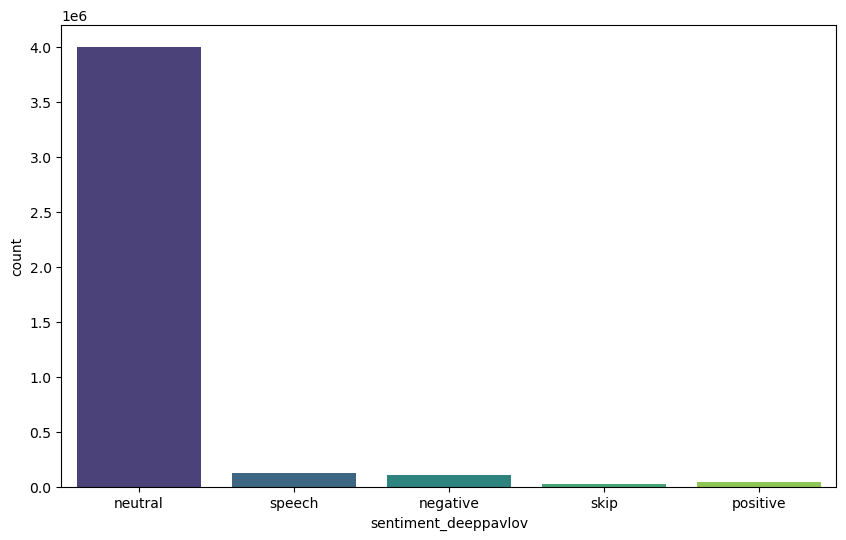

In [6]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_check, x='sentiment_deeppavlov', palette='viridis')

<Axes: xlabel='emotions_rubert', ylabel='count'>

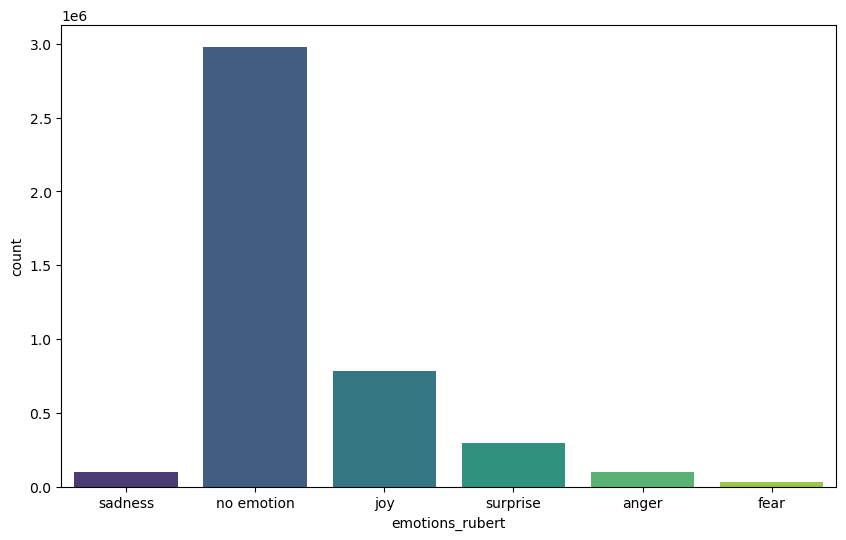

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_check, x='emotions_rubert', palette='viridis')

In [105]:
df_check[df_check["emotions_rubert"] == "no emotion"]

,dialog_ext,chat_id,msg_text,tokened,lem_tokened,sentiment_deeppavlov,emotions_rubert,probs_rubert,word2vec_vector
1,24599757,462608250741,Здравствуйте где сейчас мой заказ едет,"['здравствуйте', 'где', 'сейчас', 'мой', 'зака...","['здравствовать', 'где', 'сейчас', 'мой', 'зак...",neutral,no emotion,[9.98179078e-01 1.02714216e-03 1.19444267e-04 ...,"[0.0792250600776502, 0.06513236758432218, -0.1..."
2,24635717,433671250243,Отменить заказ,"['отменить', 'заказ']","['отменить', 'заказ']",neutral,no emotion,[9.99748409e-01 5.01940449e-05 4.79589798e-05 ...,"[0.1096613033889578, 0.09228346668756925, -0.1..."
3,24644422,640506000584,Не вижу в поиске,"['не', 'вижу', 'в', 'поиске']","['не', 'видеть', 'в', 'поиск']",neutral,no emotion,[9.99681234e-01 4.95697059e-05 5.69673939e-05 ...,"[0.1017665212441768, 0.04529423080384731, -0.0..."
4,24644697,363922000836,Помощь оператора,"['помощь', 'оператора']","['помощь', 'оператор']",neutral,no emotion,[9.99710977e-01 6.85779305e-05 6.18809499e-05 ...,"[0.0850838664919138, 0.08700053287403924, -0.1..."
6,24645522,356063750486,Продлить хранение,"['продлить', 'хранение']","['продлить', 'хранение']",neutral,no emotion,[9.99671340e-01 7.55167348e-05 4.70732884e-05 ...,"[0.09594675141852349, 0.08730765723157674, -0...."
...,...,...,...,...,...,...,...,...,...
4284723,24643147,364740251372,Есть другой вопрос,"['есть', 'другой', 'вопрос']","['быть', 'другой', 'вопрос']",neutral,no emotion,[9.98946846e-01 1.17759591e-04 1.47692772e-04 ...,"[0.11257314699469134, 0.0899026322294958, -0.1..."
4284725,24643437,358415250517,Возникла проблема,"['возникла', 'проблема']","['возникнуть', 'проблема']",neutral,no emotion,[0.7736854 0.00319693 0.0065898 0.14746679 0...,"[0.11043124682166511, 0.1159059136795501, -0.0..."
4284726,24643842,354977500676,Покупаю,['покупаю'],['покупать'],neutral,no emotion,[9.99718010e-01 4.42950804e-05 5.54832877e-05 ...,"[0.02341047301888466, 0.08457016875036061, -0...."
4284727,24643847,597897751516,Я не могу забронировать квартиру,"['я', 'не', 'могу', 'забронировать', 'квартиру']","['я', 'не', 'мочь', 'забронировать', 'квартира']",neutral,no emotion,[9.99744952e-01 4.22831217e-05 6.19976490e-05 ...,"[0.05941386753693223, 0.07102360303646751, -0...."


# Word2Vec

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [166]:
from datasets import load_dataset

dataset_for_better = load_dataset("sagteam/cedr_v1")

Generating train split:   0%|          | 0/7528 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1882 [00:00<?, ? examples/s]

In [14]:
sentences = df_check['lem_tokened'].apply(eval).tolist()
sentences[:3]

[['здравствовать',
  'я',
  'забыть',
  'забрать',
  'посылка',
  'которую',
  'вернуть',
  'быть',
  'возможность',
  'её',
  'вернуть'],
 ['здравствовать', 'где', 'сейчас', 'мой', 'заказ', 'ехать'],
 ['отменить', 'заказ']]

In [15]:
vector_size = 200
window=5
epochs = 10
w2v_model = Word2Vec(sentences, vector_size=vector_size, window=window, min_count=1, sg=1,
                  workers=4, epochs=epochs, compute_loss=True)

In [17]:
w2v_model.save("word2vec_sentiment.model")

In [20]:
word = "здравствовать"  # Замените на слово из вашего словаря
if word in w2v_model.wv:
    print(f"Вектор для '{word}':\n{w2v_model.wv[word]}")
else:
    print(f"Слово '{word}' отсутствует в словаре.")

Вектор для 'здравствовать':
[-1.36097386e-01 -7.49768168e-02 -1.68284968e-01  1.92717731e-01
 -2.55783796e-01 -5.16019203e-02  3.86594273e-02  2.75228381e-01
  1.68524206e-01  7.68940300e-02 -1.07805133e-01  4.25091609e-02
  1.15395952e-02  7.79719129e-02 -3.04178655e-01 -2.91905999e-02
 -1.74502894e-01 -2.02787250e-01  3.01362813e-01 -2.88053066e-01
  4.70340848e-02  3.70282456e-02  3.41731161e-02 -1.43641174e-01
  2.61642784e-01  4.04579528e-02  3.30926962e-02  1.20331071e-01
  1.26756718e-02  3.14455181e-01  1.01023791e-02  1.55325308e-01
  2.90267527e-01 -2.50681847e-01 -4.17360216e-01 -1.62803382e-02
  7.83737935e-03 -1.11972122e-02 -2.19628937e-03 -2.26320829e-02
 -2.06092987e-02 -2.34573603e-01 -3.49342525e-02 -1.26858816e-01
  2.30281994e-01  1.50699649e-04  1.37888342e-01 -3.84976327e-01
  1.79122120e-01  9.06050950e-02  6.32805526e-02  4.13761675e-01
  1.62740603e-01 -3.17585878e-02  4.62738842e-01  1.29866272e-01
  1.51640236e-01 -1.81958646e-01 -5.78847528e-02 -1.15173571e-

In [21]:
def text_to_vector(text, model):
    """
    Преобразует текст в векторное представление.
    text: список лемматизированных токенов
    model: обученная модель Word2Vec
    """
    vector_size = model.vector_size
    # Инициализируем нулевой вектор
    vector = np.zeros(vector_size)
    count = 0
    for word in text:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    if count != 0:
        vector /= count  # усредняем вектор
    return vector

In [25]:
df_check['word2vec_vector'] = df_check['lem_tokened'].progress_apply(lambda text: text_to_vector(text, w2v_model))

100%|██████████| 4284730/4284730 [08:26<00:00, 8452.93it/s]


## Применение

# Kmeans

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [49]:
X = np.vstack(df_check['word2vec_vector'].values)
X

array([[ 0.09726191,  0.07821838, -0.08210332, ..., -0.3009665 ,
         0.00922643, -0.11864319],
       [ 0.07922506,  0.06513237, -0.13975842, ..., -0.25643514,
         0.06268553, -0.15634407],
       [ 0.1096613 ,  0.09228347, -0.11508379, ..., -0.2618676 ,
         0.04303222, -0.06862916],
       ...,
       [ 0.05941387,  0.0710236 , -0.10966071, ..., -0.25938911,
         0.05136456, -0.179223  ],
       [ 0.01373298, -0.00804665, -0.19439655, ..., -0.19377324,
        -0.00865186, -0.3104897 ],
       [ 0.05714472,  0.04427292, -0.06416112, ..., -0.26526661,
         0.02134852, -0.23587787]])

In [50]:
X.shape

(4284730, 200)

In [55]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1)
    sse = []
    for k in iters:
        km = KMeans(n_clusters=k, random_state=17)
        km.fit(data)
        sse.append(km.inertia_)
        print(f"Fit {k} clusters")
    
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Количество кластеров')
    ax.set_xticks(iters)
    ax.set_ylabel('Сумма квадратных ошибок (SSE)')
    ax.set_title('Метод локтя для определения оптимального числа кластеров')
    plt.show()

In [56]:
find_optimal_clusters(X, max_k=15)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
optimal_k = 

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"Средний коэффициент силуэта для {optimal_k} кластеров: {silhouette_avg}")

# РАЗМЕТКА

## GPT

In [57]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 786.7 kB/s eta 0:00:0000:0100:01


In [41]:
token = ""

In [ ]:
import requests
import os
import json

headers = {"Authorization": f"OAuth {'SOY_TOKEN'}"}

data = {
    "model": "gpt-4",
    "messages": [
        {"role": "user", "content": "В каком году Гагарин полетел в космос?"},
        {"role": "assistant", "content": "В 1961."},
        {"role": "user", "content": "Как назывался корабль?"},
    ],
}

r = requests.post(
    url='http://soyproxy.yandex-team.ru/proxy/openai/v1/chat/completions',
    data=json.dumps(data, ensure_ascii=False).encode('utf-8'),
    headers=headers,
    timeout=300,
)

if r.status_code == 200:
    print(r.json()['response']['choices'][0]['message']['content'])
else:
    print(r.status_code, r.json()['response']['error']['message'])

In [42]:
from openai import OpenAI
import requests
import json
import csv

headers = {"Authorization": f"OAuth {token}"}

# Функция для генерации сообщения
def generate_message(prompt, num_messages=1, max_tokens = 50):
    messages = []
    for _ in range(num_messages):
        data = {
            "model": "gpt-3.5-turbo",
            "messages": [
                {"role": "system", "content": "Ты - пользователь, пишущий короткий (2-15 слов) вопрос в техническую поддержку на маркетплейсе. \
                 Его особенность в том, что там есть множество разных услуг (съем жилья, продажа машины, доставка)  \
                  Это должно быть не шаблонное сообщение на русском, не обязательно формальное, которое нужно мне для классификации похожих сообщений"},
                {"role": "user", "content": prompt}
            ],
            "max_tokens": max_tokens}
        res = requests.post(
            url='http://soyproxy.yandex-team.ru/proxy/openai/v1/chat/completions',
            data=json.dumps(data, ensure_ascii=False).encode('utf-8'),
            headers=headers,
            timeout=300,
        )

        if res.status_code == 200:
            # print(res.json()['response']['choices'][0]['message']['content'])
            messages.append(str(res.json()['response']['choices'][0]['message']['content']))
        else:
            print(res.status_code, res.json()['response']['error']['message'])
    return messages

In [184]:
categories_back = {
    "sadness": "Напиши сообщение поддержке с грустью.",
    "anger": "Напиши сообщение поддержке с гневом, как будто ты очень сильно разочарован сервисом",
    "joy": "Представь, что ты рад, что тебе помогли или у тебя что-то исправилось",
    "panic": "Напиши сообщение поддержке с оттенком испуга.",
    "toxic": "Напиши в токсичной форме, с нападкой. Помни, что мне это нужно для отсеивания таких же сообщений"
}

In [43]:
categories = {
    0: "Представь какую-то ситуацию, вопрос или проблему и напиши максимально формальное и нейтральное сообщение в поддержку",
}

# Генерация и сохранение сообщений для каждой категории
with open('generated_messages_neutral.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['category', 'message']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    
    for category, prompt in categories.items():
        print(f'Генерация сообщений для категории: {category}')
        messages = generate_message(prompt, num_messages=1)
        for message in messages:
            writer.writerow({'category': category, 'message': message})

print("Сообщения успешно сгенерированы и сохранены в файл 'generated_messages.csv'.")

Генерация сообщений для категории: 0
Сообщения успешно сгенерированы и сохранены в файл 'generated_messages.csv'.


## Эвристики

In [46]:
joy_words = ['благодарить', 'счастливый', 'довольный', 'спасибо'
             'выручить', 'решить', 'отлично', 'замечательно', 'улыбаться', 
             'классный', 'лучший', 'супер']

anger_words = ['недовольный', 'возмущенный', 'отвратительно', 'бесить', 'требовать',
               'сих', 'ужасный', 'сервис', 'обмануть', 'немедленно'
               'возмущение',  'твари', 'бесит', 'уроды', 'ебаный',
               'разъяснение', 'решить', 'некомпетентный', 'ужас', 'украли', 
                'черти', 'говно', 'ад', 'идиоты', 'хуй',
                'ублюдки', 'блять', 'вранье', 'обман', 'мрази'
                'жалоба']

sadness_panic_words = ['бояться', 'паника', 'срочно', 'тревога', 'непонятный',
                       'ломаться', 'ничто', 'слеза', 'глаз',
                       'расстроенный', 'решаться', 'потерялся', 'отчаяние', 'умолять',
                       'потерять', 'катастрофа', 'вообще', 'сломаться', 'мошенник',
                       'украсть', 'обидно']

In [6]:
def search_word(text, words_search = ['выполнить']):
    text = ast.literal_eval(text)
    words = len([word for word in text if word in words_search])
    if words > 0:
        return True
    return False

df[df['lem_tokened'].apply(search_word)]

,dialog_ext,chat_id,msg_text,tokened,lem_tokened,sentiment_deeppavlov,emotions_rubert,probs_rubert
214,24668658,453856000012,Здравствуйте купил у человека в игре пропуск и...,"['здравствуйте', 'купил', 'у', 'человека', 'в'...","['здравствовать', 'купить', 'у', 'человек', 'в...",neutral,no emotion,[9.99759257e-01 4.69554689e-05 5.29911813e-05 ...
2847,24684541,358582000964,Мною было направлено несколько обращений - 1. ...,"['мною', 'было', 'направлено', 'несколько', 'о...","['мною', 'было', 'направить', 'несколько', 'об...",neutral,no emotion,[9.99775469e-01 3.86472093e-05 5.38049862e-05 ...
4448,24664876,551124750169,Здравствуйте\nТут такая проблема: Наши конкуре...,"['здравствуйте', 'тут', 'такая', 'проблема', '...","['здравствовать', 'тут', 'такой', 'проблема', ...",neutral,no emotion,[9.99763072e-01 4.37468188e-05 5.00398273e-05 ...
4522,24650547,649075500036,Добрый день. Моё видео не подошло для проверки...,"['добрый', 'день', 'моё', 'видео', 'не', 'подо...","['добрый', 'день', 'моё', 'видео', 'не', 'подо...",neutral,no emotion,[9.99408007e-01 1.78890710e-04 8.27920521e-05 ...
5218,24665477,656223750027,Андрей профессионал своего дела! Обращалась с ...,"['андрей', 'профессионал', 'своего', 'дела', '...","['андрей', 'профессионал', 'свой', 'дело', 'об...",neutral,no emotion,[9.98294532e-01 1.00351952e-03 1.01703983e-04 ...
...,...,...,...,...,...,...,...,...
4277830,24617124,640407750735,Где найти акт выполненных работ,"['где', 'найти', 'акт', 'выполненных', 'работ']","['где', 'найти', 'акт', 'выполнить', 'работа']",neutral,no emotion,[9.99765098e-01 4.09834211e-05 5.02904259e-05 ...
4280431,24622628,352989258840,00015573764\nЭтот номер заказа выполнен и опла...,"['этот', 'номер', 'заказа', 'выполнен', 'и', '...","['этот', 'номер', 'заказ', 'выполнить', 'и', '...",neutral,no emotion,[9.99750078e-01 5.57901622e-05 4.37831040e-05 ...
4280879,24493706,423423750194,Здравствуйте! \n\nУ меня вопрос. У меня заказа...,"['здравствуйте', 'у', 'меня', 'вопрос', 'у', '...","['здравствовать', 'у', 'меня', 'вопрос', 'у', ...",neutral,no emotion,[9.99423504e-01 1.16678071e-04 7.60740440e-05 ...
4282227,24469993,393485000064,"Пожалуйста, подскажите, когда красный цвет уро...","['пожалуйста', 'подскажите', 'когда', 'красный...","['пожалуйста', 'подсказать', 'когда', 'красный...",neutral,joy,[7.22698346e-02 9.19228613e-01 8.31075304e-04 ...


In [47]:
def classify_emotion(text, msg_text):
    text = ast.literal_eval(text)
    joy_count = len([word for word in text if word in joy_words])
    anger_count = len([word for word in text if word in anger_words])
    sp_count = len([word for word in text if word in sadness_panic_words])

    if any((word.isupper() and len(word) > 5) for word in msg_text.split()):
        return 2

    if any(word == 'пожалуйста' for word in text):
            joy_count = 0
    
    max_count = max(joy_count, anger_count, sp_count)

    if max_count == 0:  # если ключевые слова отсутствуют
        return 0
    
    if sp_count == max_count:
        return 3
    elif anger_count == max_count:
        return 2
    else:
        return 1


In [48]:
lemmatize_text(['великолепно'])

['великолепно']

In [ ]:
classify_emotion("['аа']", 'ДОБРЫЙ день')

2

In [49]:
df['eur'] = df.progress_apply(lambda row: classify_emotion(row['lem_tokened'], row['msg_text']), axis=1)
df['eur'].value_counts()

100%|██████████| 4284730/4284730 [02:25<00:00, 29517.35it/s]


0    4057357
2     118252
3     100942
1       8179
Name: eur, dtype: int64

In [45]:
df[df['eur'] == 2].sample(10)['msg_text']

240064                                                                                                                                                                                                                                                          Меня обманули . Как наказать обидчика?
3547634                                                                                                                                                                                                    Статус заказа  RU091670205 в DPD "ОТМЕНЁН" "ВОЗВРАТ" , жду денег назад за отменённый товар.
1881575                                                                                   Добрый вечер! \nВо всех магазинах сейчас действую Новогодние АКЦИИ !!!!  Почему бы авито тоже не запустить акцию и не снизить % от услуг!!!!! Даже тоже продвижение товаров, недвижимости  ????!!!!!!!!!!!!!
3219126                                                                                                            

## Формируем новый голден

In [17]:
no_emotion_samples = df_gold[df_gold['category'] == 'no emotion'].copy()
no_emotion_samples['label'] = 0

joy_samples = df_gold[df_gold['category'] == 'joy'].copy()
joy_samples['label'] = 1

df_test_1 = pd.concat([joy_samples, no_emotion_samples]).drop(["category", "word2vec_vector"], axis = 1)
tokened_test = df_test_1['msg_text'].apply(lambda x: clean_and_tokenize(x))
df_test_1["tokened"] = tokened_test
lem_tokened = df_test_1['tokened'].progress_apply(lambda x: lemmatize_text(x))
df_test_1['lem_tokened'] = lem_tokened
df_test_1.drop(["tokened"], axis = 1)
df_test_1.sample(5)

100%|██████████| 440/440 [00:02<00:00, 173.33it/s]


,Unnamed: 0,msg_text,tokened,lem_tokened,label
136,136,Как я могу отследить свой заказ? Не могу найти информацию на сайте.,"[как, я, могу, отследить, свой, заказ, не, могу, найти, информацию, на, сайте]","[как, я, мочь, отследить, свой, заказ, не, мочь, найти, информация, на, сайт]",0
163,163,""" не могу оплатить заказ, почему?""","[не, могу, оплатить, заказ, почему]","[не, мочь, оплатить, заказ, почему]",0
917,917,"Спасибо! Ваша помощь была невероятно полезна, все заработало как надо! Очень благодарен! 🙌","[спасибо, ваша, помощь, была, невероятно, полезна, все, заработало, как, надо, очень, благодарен]","[спасибо, ваш, помощь, быть, невероятно, полезный, все, заработать, как, надо, очень, благодарный]",1
1073,1073,"Спасибо за помощь, все заработало как надо! Вы лучшие! 🌟","[спасибо, за, помощь, все, заработало, как, надо, вы, лучшие]","[спасибо, за, помощь, все, заработать, как, надо, вы, хороший]",1
49,49,Как я могу изменить адрес доставки в моем заказе?,"[как, я, могу, изменить, адрес, доставки, в, моем, заказе]","[как, я, мочь, изменить, адрес, доставка, в, мой, заказ]",0


In [18]:
examples_1 = df[df['eur'] == 1].sample(280, random_state=RANDOM_STATE)
examples_1["label"] = 1

examples_2 = df[df['eur'] == 2].sample(500, random_state=RANDOM_STATE)
examples_2["label"] = 2
examples_3 = df[df['eur'] == 3].sample(500, random_state=RANDOM_STATE)
examples_3["label"] = 3
df_test = pd.concat([df_test_1, examples_1, examples_2, examples_3])[["lem_tokened", "label", "msg_text"]]
df_extract = pd.concat([examples_1, examples_2, examples_3])[["lem_tokened", "label", "msg_text", "word2vec_sentiment.m"]]
df_test.sample(5)

,lem_tokened,label,msg_text
899,"[спасибо, за, помощь, все, заработать, как, надо, вы, хороший]",1,"Спасибо за помощь! Все заработало, как надо! Вы - лучшие! 🌟"
3192873,"['после', 'размещение', 'объявление', 'первый', 'кто', 'мне', 'позвонить', 'якобы', 'работодатель', 'хам', 'и', 'грубиян', 'не', 'представиться', 'не', 'представиться', 'завал', 'организация', 'послать', 'меня', 'прямой', 'текст']",2,"После размещения объявления, первый кто мне позвонил (якобы работодатель) ХАМ И ГРУБИЯН. Не представился, не представился завал организацию, послал меня прямым текстом"
1071,"[привет, спасибо, огромный, за, помощь, все, заработать, как, надо, вы, хороший]",1,"Привет! Спасибо огромное за помощь, все заработало как надо! Вы - лучшие!"
1040384,"['мой', 'вопрос', 'не', 'решить']",2,Мой вопрос не решен
1216942,"['получать', 'заказ', 'в', 'пункт', 'яндекс', 'доставка', 'мне', 'отказывать', 'в', 'проверка', 'электронный', 'прибор', 'что', 'мне', 'делать']",3,Получаю заказ в пункте Яндекс доставки. Мне отказывают в проверке электронного прибора. Что мне делать?


In [19]:
df_test.to_csv('test_dataset.csv', index=False)

In [20]:
df_extract.index

Int64Index([3597113, 2247033, 3372061,  998346, 3387259, 2149104,  162354,
            4042821, 1274049, 3689932,
            ...
            3203944, 2511486, 3945730, 1003372,  152404, 2554843, 3122288,
            3603163, 1872770, 3168663],
           dtype='int64', length=1280)

In [21]:
df_train = df[df["eur"] > 0].drop(df_extract.index).rename({"eur": "label"}, axis = 1)
df_train.sample(5)

,dialog_ext,chat_id,msg_text,tokened,lem_tokened,sentiment_deeppavlov,emotions_rubert,probs_rubert,label
3296976,23617330,443125250050,"Нужна помощь специалиста-человека.Вы отклонили мое объявление под номером 3820247809.Я его больше не буду исправлять!Возместите(компенсирует) стоимость такого же объявления за ваш счет,иначе я обращусь в суд!!!Вы не должны обязывать меня размещать объявление так,как мне нужно!!!","['нужна', 'помощь', 'отклонили', 'мое', 'объявление', 'под', 'номером', 'его', 'больше', 'не', 'буду', 'исправлять', 'возместите', 'компенсирует', 'стоимость', 'такого', 'же', 'объявления', 'за', 'ваш', 'счет', 'иначе', 'я', 'обращусь', 'в', 'суд', 'вы', 'не', 'должны', 'обязывать', 'меня', 'размещать', 'объявление', 'так', 'как', 'мне', 'нужно']","['нужный', 'помощь', 'отклонить', 'мой', 'объявление', 'под', 'номер', 'его', 'больше', 'не', 'быть', 'исправлять', 'возместить', 'компенсировать', 'стоимость', 'такой', 'же', 'объявление', 'за', 'ваш', 'счёт', 'иначе', 'я', 'обратиться', 'в', 'суд', 'вы', 'не', 'должный', 'обязывать', 'меня', 'размещать', 'объявление', 'так', 'как', 'мне', 'нужный']",neutral,no emotion,[0.70452517 0.00274147 0.02157478 0.01140276 0.00695233 0.25280347],2
1424951,21520247,352372250941,"Добрый день! Мною был куплен у продавца MAKSIM нож за 7 тыс. руб. с использованием Авитодоставки через почту РФ. Сроки доставки уже несколько раз переносятся. Скажите, какой у вас лимит на перенос сроков, после которого товар считается утеряным? И есть ли у вас возможность воздействовать на почту РФ, для поиска посылки?","['добрый', 'день', 'мною', 'был', 'куплен', 'у', 'продавца', 'maksim', 'нож', 'за', 'тыс', 'руб', 'с', 'использованием', 'авитодоставки', 'через', 'почту', 'рф', 'сроки', 'доставки', 'уже', 'несколько', 'раз', 'переносятся', 'скажите', 'какой', 'у', 'вас', 'лимит', 'на', 'перенос', 'сроков', 'после', 'которого', 'товар', 'считается', 'утеряным', 'и', 'есть', 'ли', 'у', 'вас', 'возможность', 'воздействовать', 'на', 'почту', 'рф', 'для', 'поиска', 'посылки']","['добрый', 'день', 'мною', 'быть', 'купить', 'у', 'продавец', 'maksim', 'нож', 'за', 'тыс', 'руб', 'с', 'использование', 'авитодоставки', 'через', 'почта', 'рф', 'срок', 'доставка', 'уже', 'несколько', 'раз', 'переноситься', 'сказать', 'какой', 'у', 'вас', 'лимит', 'на', 'перенос', 'срок', 'после', 'которого', 'товар', 'считаться', 'утеряным', 'и', 'есть', 'ли', 'у', 'вас', 'возможность', 'воздействовать', 'на', 'почта', 'рф', 'для', 'поиск', 'посылка']",neutral,no emotion,[9.99244094e-01 1.65416888e-04 7.13273257e-05 2.75399012e-04\n 1.18188807e-04 1.25609440e-04],2
580679,25308369,358374000127,Решить проблему,"['решить', 'проблему']","['решить', 'проблема']",neutral,no emotion,[9.99717653e-01 5.09473393e-05 5.87142313e-05 5.15437641e-05\n 6.24998938e-05 5.86053684e-05],2
2548258,22744736,354480500804,"добрый вечер! не вернулись деньги за отмененный заказ № 70000000053621339 от 07 января 2024, банк не видит. что делать? спасибо","['добрый', 'вечер', 'не', 'вернулись', 'деньги', 'за', 'отмененный', 'заказ', 'от', 'января', 'банк', 'не', 'видит', 'что', 'делать', 'спасибо']","['добрый', 'вечер', 'не', 'вернуться', 'деньга', 'за', 'отмененный', 'заказ', 'от', 'январь', 'банк', 'не', 'видеть', 'что', 'делать', 'спасибо']",neutral,no emotion,[9.86313224e-01 8.09651054e-03 5.76399325e-04 4.03503701e-03\n 2.56632396e-04 7.22211786e-04],3
543133,25295588,371523000291,"№ 70000000069760178 от 22 февраля 2024 утерян заказ почтой россии, что делать?","['от', 'февраля', 'утерян', 'заказ', 'почтой', 'россии', 'что', 'делать']","['от', 'февраль', 'утерять', 'заказ', 'почта', 'россия', 'что', 'делать']",neutral,no emotion,[9.99726117e-01 4.53049834e-05 6.50842558e-05 6.51007649e-05\n 4.97390029e-05 4.86927493e-05],3


In [22]:
df_train.to_csv("finetune.csv")

## Еще раз

In [51]:
class_0_samples = df[df['eur'] == 0].drop(df_extract.index).sample(10000, random_state=1)
class_1_samples = df[df['eur'] == 1].drop(df_extract.index)
class_2_samples = df[df['eur'] == 2].drop(df_extract.index).sample(20000, random_state=1)
class_3_samples = df[df['eur'] == 3].drop(df_extract.index).sample(20000, random_state=1)

df_train_2 = pd.concat([class_0_samples, class_1_samples, class_2_samples, class_3_samples]).rename({"eur": "label"}, axis = 1)

KeyError: '[3597113, 2247033, 3372061, 998346, 3387259, 2149104, 162354, 4042821, 1274049, 3689932, 2238999, 3847879, 1442970, 958162, 2809750, 2629194, 1368591, 3834590, 1656317, 205173, 3843946, 3364528, 1209499, 2739705, 3661383, 1266891, 2699033, 3290200, 3316219, 2772766, 124119, 1988216, 2621519, 3447887, 1243263, 4178818, 1894775, 2252307, 3566464, 3882443, 1417286, 3092055, 1430147, 481022, 2826012, 3088297, 2938290, 93175, 1200515, 879631, 201030, 4243678, 2292635, 2508106, 4055887, 2020997, 2041978, 3262661, 2159953, 2675396, 3839187, 3130749, 3577463, 1316454, 2881097, 962526, 178601, 2697840, 966029, 13139, 78182, 1471237, 4073482, 1610187, 642017, 3268616, 2975734, 4010240, 3077641, 447028, 3838213, 3307618, 3352490, 506288, 579968, 2851426, 2436245, 1135363, 3135245, 2415298, 3834832, 3982555, 806120, 1510582, 3598692, 2455952, 3286429, 3943839, 2225681, 388458, 472467, 3665116, 3791933, 3263161, 1741990, 1565520, 1596915, 1677586, 2972174, 2441709, 1585410, 2580972, 2171192, 2861185, 4034056, 302505, 3403399, 1815454, 391711, 3432683, 609721, 1314807, 46627, 459567, 3422963, 909953, 3127780, 2266755, 2821588, 705269, 468209, 3723712, 2026330, 3122830, 3783509, 3626046, 4137055, 1532156, 3418584, 814462, 2828670, 3152794, 2232470, 584359, 2326666, 514624, 2860899, 2638322, 2212393, 2873840, 390520, 795161, 3095696, 3841235, 3406235, 3524400, 2222028, 338236, 2624269, 332249, 2396165, 4275347, 1584831, 398518, 929458, 919233, 2659056, 877141, 676344, 397709, 1591111, 1259482, 925591, 2576436, 3169331, 1394216, 1268035, 3932568, 2282392, 2014454, 2754569, 1299078, 11337, 2131591, 2543872, 3287063, 3696211, 3389640, 2877888, 3690762, 1226050, 3543949, 2131306, 2035649, 400057, 3697351, 4185333, 2921392, 1455068, 1890216, 296880, 2658460, 270187, 2658054, 2915484, 1131967, 2620033, 2896796, 3430271, 3791900, 2362818, 1519340, 3136489, 3535568, 1748929, 71625, 947501, 2591752, 910424, 689587, 699698, 4076322, 2670478, 3570189, 4198033, 2877003, 1205673, 3187391, 1516161, 969098, 2868940, 4199193, 1506907, 1590673, 3314248, 3469859, 679625, 623162, 462752, 3530547, 2233406, 2949008, 4260405, 2509310, 3884906, 100418, 354259, 1604983, 3329184, 354458, 3909773, 2809049, 1761268, 2217073, 469461, 4045028, 3183302, 283131, 2832187, 791361, 2585550, 599476, 3404739, 3314405, 1936458, 3849809, 4223430, 547084, 3751589, 3124666, 4279078, 2163901, 2370547, 2104887, 2637611, 638955, 1738845, 797368, 1482376, 2949205, 2531912, 2836697, 293645, 1330218, 3241965, 1721128, 2650921, 2397698, 3501081, 1780419, 546868, 2447899, 702923, 2148717, 2027604, 1966271, 2756001, 1514446, 331809, 701275, 2695235, 552281, 3253551, 3398222, 3344533, 2593666, 2518908, 1944785, 2539098, 2686171, 3021293, 3493760, 21871, 3798041, 3061485, 2928796, 1870018, 3768976, 2309479, 4194179, 3210381, 1455657, 2165899, 36910, 2349131, 4155138, 2694649, 207473, 2321487, 1470194, 1924061, 1572032, 3981028, 673265, 1113313, 1078913, 573498, 1781798, 4152515, 3353350, 2085875, 4102469, 2018971, 2650415, 1300175, 2451650, 2070091, 294349, 2617807, 3431835, 2384653, 1612850, 2984067, 4194060, 350395, 561741, 3300387, 786965, 4065970, 4140598, 1251910, 3353131, 1816911, 3882826, 3967118, 3508314, 3198432, 1736509, 2279194, 3026756, 3527814, 1744049, 2711079, 3192289, 2960263, 3662476, 1959058, 4151127, 880757, 5740, 1943809, 1876077, 2122887, 3258920, 2110643, 1511069, 1026426, 3910509, 2316096, 1306513, 601049, 3460527, 3330560, 148305, 4227705, 897902, 2366362, 2598150, 1947772, 1759924, 2412677, 4233034, 1464014, 896898, 3111892, 1201524, 3892587, 1775934, 1919686, 54560, 1146719, 1611216, 2621061, 2797582, 1255945, 1013060, 2831057, 109415, 3192873, 2961391, 1059455, 993766, 2456447, 2926806, 3577331, 901194, 1686575, 782465, 1544180, 712486, 4169532, 590097, 2702888, 1372401, 2072179, 1083270, 3906947, 1508635, 3322507, 2955441, 2762832, 965371, 1536855, 2647936, 1679355, 4139820, 2823674, 341772, 4076063, 1996307, 4048299, 3575244, 1892225, 1893009, 1725198, 2393278, 338152, 3670859, 1029169, 1545845, 2944702, 2093500, 2548144, 1370080, 943460, 3282694, 77735, 2328459, 1345531, 1157406, 2306383, 2854214, 2474334, 2853352, 732118, 320966, 4160005, 2690906, 3011084, 4056066, 2940380, 1056787, 2000462, 2011851, 3259966, 409945, 3729531, 3405269, 2140589, 4149421, 2668257, 427244, 1631191, 1622905, 2768378, 1040384, 1652658, 3523100, 970781, 2139842, 2393004, 3748805, 1100379, 3324182, 4143872, 4060063, 681519, 3146446, 3436429, 1401504, 1467102, 575644, 3582719, 931790, 1032125, 3129698, 1485822, 3088930, 3946460, 2593690, 1259603, 265585, 87245, 2364640, 1646017, 117409, 2785267, 3123302, 4207883, 2612311, 2457621, 1773627, 2284343, 790314, 2083117, 296416, 2755708, 4131941, 4140635, 2567764, 2495535, 91577, 3530610, 502167, 3397845, 3449998, 1843595, 2407040, 3178847, 3577068, 1777912, 3537952, 584466, 463668, 1664863, 1488601, 3015763, 39255, 1318859, 1251074, 2412933, 366896, 1767443, 3551983, 3761654, 785084, 1427511, 894662, 2875559, 2697081, 2389216, 956747, 2456771, 3703986, 3858183, 4106221, 98837, 2479909, 863204, 668120, 4266606, 643873, 455152, 2856938, 2964284, 1698574, 257405, 3044152, 710854, 3489602, 1676609, 4001862, 2031212, 2637846, 610432, 1248858, 3954924, 2183836, 2997494, 2257538, 3098098, 4120704, 2733009, 3749984, 2171474, 3369813, 2446295, 2322804, 702137, 2201906, 2689824, 3954396, 1995188, 2118706, 2997608, 3367405, 2339724, 3620728, 1453079, 2012454, 2783042, 4260361, 1148130, 543089, 2261965, 1742976, 3758683, 2395688, 1382459, 1937116, 3374875, 3750938, 1119650, 2060027, 196055, 1812972, 1830844, 602849, 3476514, 2522864, 3311753, 3610016, 3845773, 1985004, 2434179, 3467195, 3546552, 1307210, 225573, 1172143, 2493423, 3746241, 2660751, 2918162, 3180887, 2673037, 1688996, 2593586, 229719, 2462858, 4213059, 987958, 3285920, 1606953, 1154918, 3443989, 1899353, 970603, 3649806, 973870, 3977564, 3555690, 3177491, 4237347, 607955, 4136307, 3919195, 3501840, 1598177, 4014206, 2094810, 1527661, 4138359, 993614, 828541, 2005399, 614017, 2267604, 3415998, 793859, 1112088, 1996126, 1830557, 2684451, 1829843, 1882569, 994022, 3292896, 1865520, 1707073, 1719454, 312030, 1576501, 502712, 2381225, 83842, 1871292, 3697538, 4010017, 3387472, 845644, 631523, 2146668, 704062, 463908, 964543, 162932, 1518718, 958562, 3718407, 1919586, 496116, 2972120, 1191143, 3278627, 4204896, 3396291, 2788635, 4013039, 1604802, 2900276, 4186907, 4163877, 4134422, 52799, 1941737, 3578158, 2487854, 1595355, 1155765, 2113823, 1598777, 3426077, 1142512, 3189891, 3011318, 3056470, 1684346, 3872595, 3199215, 504693, 1509269, 1898510, 3618389, 782248, 232581, 2453835, 528691, 3549594, 1631798, 768614, 210248, 3471312, 3381333, 2529984, 4079095, 187172, 3270077, 482588, 88879, 4085404, 3112569, 48650, 1116459, 3539960, 437284, 1066, 1224519, 611855, 2935197, 27734, 1400889, 53178, 4110473, 633783, 152502, 2674413, 1701146, 2560458, 426034, 2429037, 3753150, 2691925, 223275, 1656825, 3265488, 934476, 1150599, 4188966, 3683993, 4107990, 1422238, 2618672, 1553427, 3553760, 2155441, 1251199, 1873966, 2585328, 424207, 1721219, 1608775, 3429905, 278495, 3033446, 1687374, 1734995, 1135649, 161746, 77884, 1665742, 3308385, 2538565, 3623970, 157192, 2162294, 3602471, 1627417, 232945, 3409824, 719748, 1672500, 3881178, 2765714, 1863360, 3081368, 1116352, 28669, 77631, 517614, 1012579, 595985, 160847, 2508399, 3874054, 990490, 3710113, 24552, 2148443, 1981660, 4167316, 1706069, 1098307, 197851, 3483679, 793795, 1763648, 493057, 3530399, 3246564, 1882695, 3218659, 3684702, 3986528, 2597757, 1250591, 484520, 3262689, 137395, 185201, 821936, 1037589, 1986223, 385080, 2443339, 3167505, 85015, 1709945, 4001972, 1276758, 256069, 2036931, 3646148, 2985593, 4046577, 1398853, 3576206, 3060066, 3067584, 915013, 155194, 3191705, 4129689, 4233438, 2415049, 2033892, 2763723, 1252286, 4218581, 3228353, 3712822, 1570337, 403398, 1276548, 288514, 3164727, 340503, 2801264, 3713951, 655222, 1311205, 992971, 1815112, 2120786, 2302863, 3652848, 1659048, 1715494, 1627774, 1858922, 1867743, 1477444, 2608524, 3620098, 2733444, 1005145, 3503615, 88463, 3235720, 3244611, 1111175, 3692846, 1972481, 3529406, 4019270, 2869817, 2164707, 1142577, 381162, 1704226, 2353926, 1842406, 2641873, 1901719, 3572331, 1684714, 1915632, 3070542, 2342869, 2875129, 2932064, 1263292, 1781999, 2098970, 1640045, 2355472, 3765888, 4248410, 1094546, 714678, 2937445, 1229189, 944343, 1295767, 632934, 3121461, 2352300, 3365522, 3788332, 900709, 561232, 3742894, 1474602, 3120284, 2298467, 2266672, 3449294, 1016024, 3879236, 2105219, 254719, 3878077, 557621, 3360348, 2795252, 296052, 1707959, 1546814, 932494, 464197, 3477639, 3203944, 152404, 2554843, 3122288, 3603163, 3168663] not found in axis'

In [ ]:
df_train_2.to_csv("finetune_2.csv")

# Применение на голденах

### Старый голд

In [143]:
import re
def clean_text(text):
    # Удаляем слова "Привет" и "Здравствуйте" вместе со знаком препинания после них
    text = re.sub(r'\b(Привет|Здравствуйте)\b[.,!?;:]*', '', text)

    # Удаляем фразы "Спасибо", "Спасибо за помощь" с конца строки вместе со знаком препинания
    text = re.sub(r'(Спасибо( за помощь)*)[.,!?;:]*$', '', text)

    # Удаляем лишние пробелы
    text = text.strip()
    
    # Возвращаем очищенный текст
    return text

In [232]:
df_gold = pd.read_csv("generated_messages.csv")
df_for_add = pd.read_csv("generated_messages_sadness.csv")
df_for_add2 = pd.read_csv("generated_messages_anger.csv")
df_for_add3 = pd.read_csv("generated_messages_joy.csv")
df_for_add4 = pd.read_csv("generated_messages_panic.csv")
df_gold = pd.concat([df_gold, df_for_add, df_for_add2, df_for_add4], ignore_index = True)
df_gold["msg_text"] = df_gold["message"].apply(clean_text)

df_for_add3["msg_text"] = df_for_add3["message"]
df_gold = pd.concat([df_gold, df_for_add3], ignore_index = True).drop("message", axis = 1)
df_gold

,category,msg_text
0,no emotion,Как изменить адрес доставки после оформления з...
1,no emotion,Как мне вернуть товар и получить возврат средств?
2,no emotion,Как можно добавить товар в избранное на вашем ...
3,no emotion,"Не могу найти кнопку оплаты, подскажите, где о..."
4,no emotion,"Подскажите, как поменять адрес доставки в моем..."
...,...,...
1095,joy,"Ура! Спасибо за помощь, все заработало! Вы мол..."
1096,joy,"Спасибо за помощь! Все заработало как надо, вы..."
1097,joy,"Спасибо за помощь! Проблема решена, вы молодцы..."
1098,joy,Спасибо вам за помощь! Наконец-то все заработа...


In [247]:
tokened = df_gold['msg_text'].apply(lambda x: clean_and_tokenize(x))
df_gold['tokened'] = tokened
lem_tokened = df_gold['tokened'].progress_apply(lambda x: lemmatize_text(x))
df_gold['lem_tokened'] = lem_tokened
df_gold['lem_tokened']

100%|██████████| 1100/1100 [00:05<00:00, 184.46it/s]


0       [как, изменить, адрес, доставка, после, оформл...
1       [как, мне, вернуть, товар, и, получить, возвра...
2       [как, можно, добавить, товар, в, избранный, на...
3       [не, мочь, найти, кнопка, оплата, подсказать, ...
4       [подсказать, как, поменять, адрес, доставка, в...
                              ...                        
1095    [ура, спасибо, за, помощь, все, заработать, вы...
1096    [спасибо, за, помощь, все, заработать, как, на...
1097    [спасибо, за, помощь, проблема, решить, вы, мо...
1098    [спасибо, вам, за, помощь, все, заработать, ка...
1099    [спасибо, за, помощь, все, заработать, как, на...
Name: lem_tokened, Length: 1100, dtype: object

In [248]:
df_gold['word2vec_vector'] = df_gold['lem_tokened'].progress_apply(lambda text: text_to_vector(text, w2v_model))

100%|██████████| 1100/1100 [00:00<00:00, 7153.44it/s]


In [249]:
df_gold

,category,msg_text,tokened,lem_tokened,word2vec_vector
0,no emotion,Как изменить адрес доставки после оформления з...,"[как, изменить, адрес, доставки, после, оформл...","[как, изменить, адрес, доставка, после, оформл...","[0.03068798065318593, -0.28024924440043314, -0..."
1,no emotion,Как мне вернуть товар и получить возврат средств?,"[как, мне, вернуть, товар, и, получить, возвра...","[как, мне, вернуть, товар, и, получить, возвра...","[0.04305518418550491, -0.17196655640145764, -0..."
2,no emotion,Как можно добавить товар в избранное на вашем ...,"[как, можно, добавить, товар, в, избранное, на...","[как, можно, добавить, товар, в, избранный, на...","[-0.047046226242350206, -0.0659172920924094, -..."
3,no emotion,"Не могу найти кнопку оплаты, подскажите, где о...","[не, могу, найти, кнопку, оплаты, подскажите, ...","[не, мочь, найти, кнопка, оплата, подсказать, ...","[0.11383476255772014, 0.008026982036729654, -0..."
4,no emotion,"Подскажите, как поменять адрес доставки в моем...","[подскажите, как, поменять, адрес, доставки, в...","[подсказать, как, поменять, адрес, доставка, в...","[-0.0750964225444477, -0.18491655599791557, -0..."
...,...,...,...,...,...
1095,joy,"Ура! Спасибо за помощь, все заработало! Вы мол...","[ура, спасибо, за, помощь, все, заработало, вы...","[ура, спасибо, за, помощь, все, заработать, вы...","[-0.022914606612175703, -0.1910258854040876, -..."
1096,joy,"Спасибо за помощь! Все заработало как надо, вы...","[спасибо, за, помощь, все, заработало, как, на...","[спасибо, за, помощь, все, заработать, как, на...","[-0.007524112472310662, -0.20599687673772374, ..."
1097,joy,"Спасибо за помощь! Проблема решена, вы молодцы...","[спасибо, за, помощь, проблема, решена, вы, мо...","[спасибо, за, помощь, проблема, решить, вы, мо...","[-0.02573415071058732, -0.1526527269385182, -0..."
1098,joy,Спасибо вам за помощь! Наконец-то все заработа...,"[спасибо, вам, за, помощь, все, заработало, ка...","[спасибо, вам, за, помощь, все, заработать, ка...","[-0.03357440186664462, -0.2093021866865456, -0..."


## Оценка модели

### Само применение

In [156]:
tokenizer2 = AutoTokenizer.from_pretrained(model_cedr_name)
model2 = AutoModelForSequenceClassification.from_pretrained(model_cedr_name)

model2.to(DEVICE)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-

In [33]:
emotion_labels = [0, 1, 3, 1, 3, 2]

def predict_emotion(text):
    inputs = tokenizer2(text, return_tensors="pt", truncation=True, padding=True)
    inputs = {key: value.to(DEVICE) for key, value in inputs.items()}  
    with torch.no_grad():
        outputs = model2(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    predicted_class = torch.argmax(probabilities, dim=-1)
    predicted_emotion = emotion_labels[predicted_class.item()]
    return predicted_emotion, probabilities.tolist()

In [158]:
results = df_test['msg_text'].progress_apply(predict_emotion)

100%|██████████| 1720/1720 [00:08<00:00, 206.57it/s]


In [159]:
emots, probs = zip(*results)

In [160]:
np.array(emots)

array([1, 1, 1, ..., 0, 0, 0])

In [184]:
emots = np.array(emots)
emots

array([1, 1, 1, ..., 0, 0, 0])

### Точность

In [183]:
df_test

,lem_tokened,label,msg_text
880,"[спасибо, за, поддержка, проблема, решить, вы, молодцы, так, держать]",1,"Спасибо за поддержку! Проблема решена, вы молодцы! Так держать! 🌟"
881,"[спасибо, вам, проблема, решить, и, я, очень, рад, спасибо, за, ваш, помощь]",1,"Спасибо вам! Проблема решена, и я очень рад! Спасибо за вашу помощь!"
882,"[спасибо, все, заработать, как, надо, вы, хороший, благодарить, за, быстрый, и, качественный, поддержка]",1,"Спасибо! Все заработало как надо, вы лучшие! Благодарю за быструю и качественную поддержку!"
883,"[ура, спасибо, вам, за, помощь, все, заработать, ваш, поддержка, просто, отличный]",1,"Ура! Спасибо вам за помощь, все заработало! Ваша поддержка - просто отличная! 🙌🌟"
884,"[спасибо, ваш, помощь, быть, на, высокий, уровень, я, в, восторг, от, быстрый, решение, проблема]",1,Спасибо! Ваша помощь была на высшем уровне. Я в восторге от быстрого решения проблемы!
...,...,...,...
3108311,"['здравствовать', 'что', 'делать', 'если', 'продавец', 'игнорировать']",3,Здравствуйте что делать если продавец игнорирует
3537733,"['продавец', 'оказаться', 'мошенник', 'договориться', 'что', 'отправить', 'по', 'предоплата', 'после', 'получение', 'деньга', 'перестать', 'выходить', 'на', 'связь']",3,"Продавец оказался мошенником, договорились, что отправит по предоплате, после получения денег перестал выходить на связь."
1973199,"['здравствовать', 'что', 'делать', 'если', 'выбранный', 'пункт', 'выдача', 'закрыться']",3,Здравствуйте что делать если выбранный пункт выдачи закрылся?
714231,"['здравствовать', 'не', 'мочь', 'разместить', 'объявление', 'в', 'рубрика', 'вакансия', 'при', 'размещение', 'новый', 'вакансия', 'происходить', 'блокировка', 'по', 'причина', 'повторный', 'размещение', 'объявление', 'у', 'меня', 'разный', 'в', 'них', 'разный', 'вакансия', 'условие', 'труд', 'и', 'уровень', 'оплата', 'что', 'делать']",3,"Здравствуйте! Не могу разместить объявления в рубрике вакансии. При размещении новых вакансий происходит блокировка по причине повторного размещения. Объявления у меня разные: в них разные вакансии, условия труда и уровень оплаты. Что делать?"


In [38]:
def calculate_metrics(df, emots):
    # Создание нового столбца с предсказаниями для удобства
    df['predicted_category'] = emots

    # Получение уникальных категорий
    categories = df['label'].unique()

    # Словари для хранения полноты и F1-меры
    category_recall = {}
    category_f1 = {}

    # Вычисление полноты и F1-меры для каждой категории
    for category in categories:
        # True labels и predicted labels для текущей категории
        true_labels = (df['label'] == category).astype(int)
        predicted_labels = (df['predicted_category'] == category).astype(int)
        
        # Recall
        recall = recall_score(true_labels, predicted_labels, zero_division=1)
        category_recall[category] = recall
        
        # F1 Score
        f1 = f1_score(true_labels, predicted_labels, zero_division=1)
        category_f1[category] = f1

    return category_recall, category_f1

In [169]:
category_recall, category_f1 = calculate_metrics(df_test, emots)

# Создание DataFrame для удобства визуализации
metrics_df = pd.DataFrame({
    'Category': category_recall.keys(),
    'Recall': category_recall.values(),
    'F1 Score': category_f1.values()
})

# Вычисление средних значений и добавление их как отдельную категорию
average_recall = metrics_df['Recall'].mean()
average_f1 = metrics_df['F1 Score'].mean()

metrics_df = metrics_df.append({'Category': 'mean', 'Recall': average_recall, 'F1 Score': average_f1}, ignore_index=True)

/var/folders/81/qqq843bd71s3bnlfl46k0m8506yyx0/T/ipykernel_33607/3912638169.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Category': 'mean', 'Recall': average_recall, 'F1 Score': average_f1}, ignore_index=True)


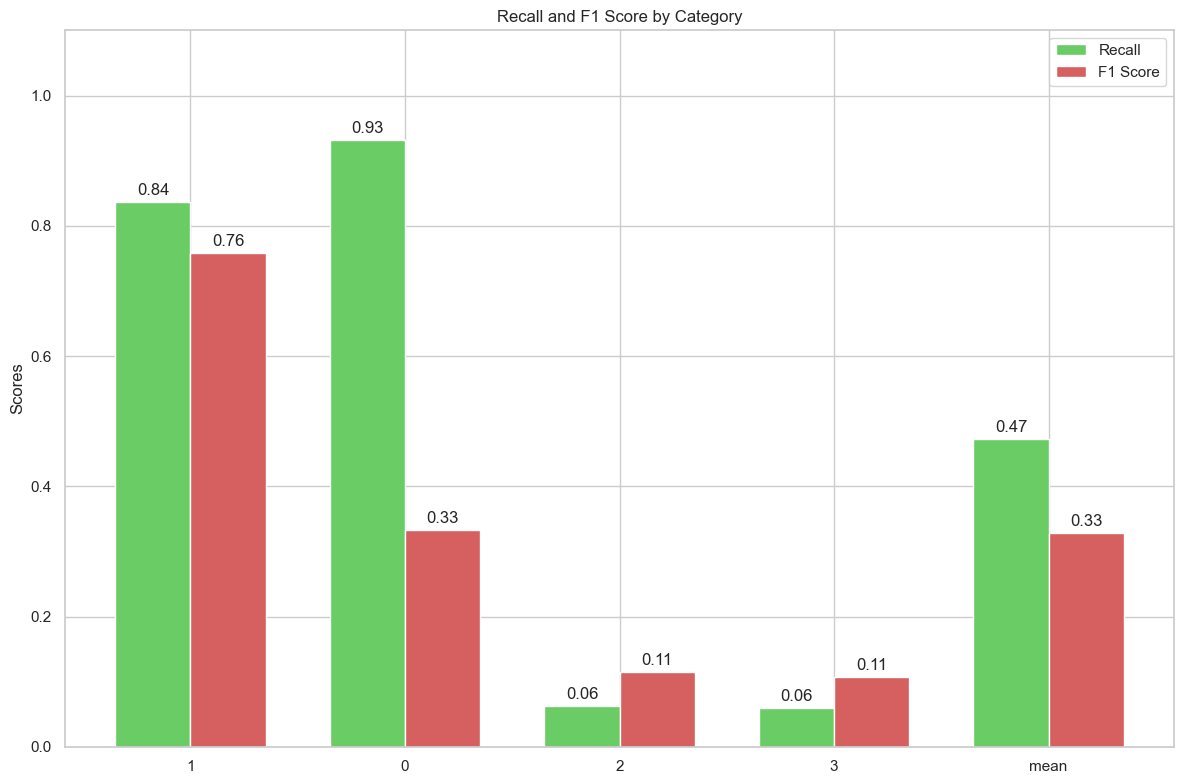

In [174]:
sns.set(style="whitegrid")
palette = sns.color_palette("muted")

categories = metrics_df['Category']
recall = metrics_df['Recall']
f1_scores = metrics_df['F1 Score']

x = np.arange(len(categories))
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - width/2, recall, width, label='Recall', color=palette[2])
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score', color=palette[3])

ax.set_ylabel('Scores')
ax.set_title('Recall and F1 Score by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_ylim(0, 1.1)

fig.tight_layout()
plt.show()

## Оценка файнтюна

### Само применение

In [32]:
model_finetune_1 = "bert_1"
tokenizer3 = AutoTokenizer.from_pretrained(f'{model_finetune_1}_tok', local_files_only=True)
model3 = AutoModelForSequenceClassification.from_pretrained(model_finetune_1, local_files_only=True)

model3.to(DEVICE)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(83828, 312, padding_idx=0)
      (position_embeddings): Embedding(2048, 312)
      (token_type_embeddings): Embedding(2, 312)
      (LayerNorm): LayerNorm((312,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-2): 3 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=312, out_features=312, bias=True)
              (key): Linear(in_features=312, out_features=312, bias=True)
              (value): Linear(in_features=312, out_features=312, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=312, out_features=312, bias=True)
              (LayerNorm): LayerNorm((312,), eps=1e-

In [34]:
emotion_labels = [0, 1, 3, 1, 3, 2]

def predict_emotion_3(text):
    inputs = tokenizer3(text, return_tensors="pt", truncation=True, padding=True)
    inputs = {key: value.to(DEVICE) for key, value in inputs.items()}  
    with torch.no_grad():
        outputs = model3(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    predicted_class = torch.argmax(probabilities, dim=-1)
    predicted_emotion = emotion_labels[predicted_class.item()]
    return predicted_emotion, probabilities.tolist()

In [35]:
results = df_test['msg_text'].progress_apply(predict_emotion_3)

100%|██████████| 1720/1720 [00:06<00:00, 254.93it/s]


In [36]:
emots_3, probs_3 = zip(*results)
emots_3 = np.array(emots_3)
emots_3

array([2, 2, 1, ..., 3, 3, 3])

In [39]:
category_recall, category_f1 = calculate_metrics(df_test, emots_3)

# Создание DataFrame для удобства визуализации
metrics_df = pd.DataFrame({
    'Category': category_recall.keys(),
    'Recall': category_recall.values(),
    'F1 Score': category_f1.values()
})

# Вычисление средних значений и добавление их как отдельную категорию
average_recall = metrics_df['Recall'].mean()
average_f1 = metrics_df['F1 Score'].mean()

metrics_df = metrics_df.append({'Category': 'mean', 'Recall': average_recall, 'F1 Score': average_f1}, ignore_index=True)

/var/folders/81/qqq843bd71s3bnlfl46k0m8506yyx0/T/ipykernel_82068/1141075459.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Category': 'mean', 'Recall': average_recall, 'F1 Score': average_f1}, ignore_index=True)


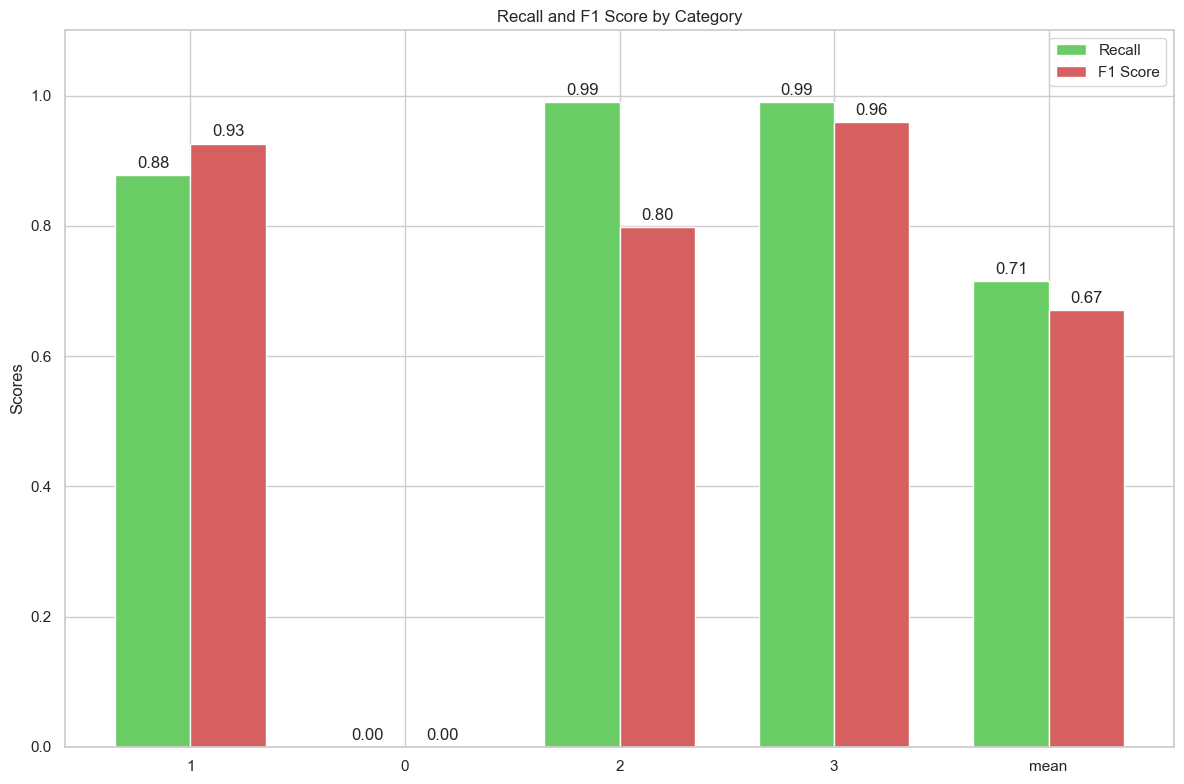

In [40]:
sns.set(style="whitegrid")
palette = sns.color_palette("muted")

categories = metrics_df['Category']
recall = metrics_df['Recall']
f1_scores = metrics_df['F1 Score']

x = np.arange(len(categories))
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - width/2, recall, width, label='Recall', color=palette[2])
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score', color=palette[3])

ax.set_ylabel('Scores')
ax.set_title('Recall and F1 Score by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_ylim(0, 1.1)

fig.tight_layout()
plt.show()

# Файнтюн

In [187]:
reverse_emotions_labels = [0, 1, 5, 2]
df_train_finetune = df_train.copy()

label_mapping = {0: reverse_emotions_labels[0],
                 1: reverse_emotions_labels[1],
                 2: reverse_emotions_labels[2],
                 3: reverse_emotions_labels[3]}

df_train_finetune['label'] = df_train_finetune['label'].map(label_mapping)

In [197]:
tokenizer = AutoTokenizer.from_pretrained(model_cedr_name)
model = AutoModelForSequenceClassification.from_pretrained(model_cedr_name)

In [ ]:
def tokenize_function(texts):
    return tokenizer(texts, padding='max_length', truncation=True)

# Установка тренировочных данных
train_encodings = tokenize_function(df_train['msg_text'].tolist())
train_labels = df_train["label"]

In [ ]:
class EmotionDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [ ]:
train_dataset = EmotionDataset(train_encodings, train_labels)

# Настройки обучения
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="steps"
)

# Тренировка модели
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset
)

trainer.train()

# Детекция зла

In [188]:
tokenizer_evil = AutoTokenizer.from_pretrained(model_evil_name)
model_evil = AutoModelForSequenceClassification.from_pretrained(model_evil_name)

model_evil.to(DEVICE)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1

In [189]:
evil_labels = ["neutral", "toxic"]

def predict_evil(text):
    inputs = tokenizer_evil(text, return_tensors="pt", truncation=True, padding=True)
    inputs = {key: value.to(DEVICE) for key, value in inputs.items()}  
    with torch.no_grad():
        outputs = model_evil(**inputs)
    logits = outputs.logits
    probabilities = torch.nn.functional.softmax(logits, dim=-1)
    predicted_class = torch.argmax(probabilities, dim=-1)
    
    return predicted_class.item(), probabilities.tolist()

In [190]:
results_evil = df_test['msg_text'].progress_apply(predict_evil)

100%|██████████| 1720/1720 [02:09<00:00, 13.32it/s]


In [191]:
emots_evil, classes_evil = zip(*results_evil)

In [195]:
df_test_evil = df_test.copy()
df_test_evil["evil_label"] = emots_evil

In [196]:
df_test_evil[df_test_evil["evil_label"] == 1]

,lem_tokened,label,msg_text,evil_label
2896509,"['всё', 'хорошо', 'замечательно', 'офигительно', 'заи', 'л', 'ваш', 'бот']",1,"Всё хорошо, замечательно, офигительно, заи..л ваш бот #",1
1304948,"['вы', 'меня', 'за', 'долбаеба', 'принимать', 'смотреть', 'я', 'в', 'парк', 'спам', 'нет', 'блять', 'от', 'вас', 'ни', 'какой', 'письмо']",2,"Вы меня за долбаеба принимаете? Смотрел я в парке спам, нет блять от вас ни какого письма!!",1
3059602,"['какой', 'хуя', 'мне', 'рекомендация', 'самар', 'рижний', 'новгород', 'и', 'ульяновск', 'ваш', 'сойти', 'с', 'ум', 'жить', 'в', 'спб', 'и', 'обьявления', 'просматривать', 'в', 'спб']",2,"Какого хуя мне рекомендации самара , рижний новгород и ульяновск???? Ваш И.И. сошел с ума?????.я живу в спб и обьявления просматриваю в спб",1
1247274,"['я', 'удалить', 'несколько', 'объявление', 'с', 'игрушка', 'чтобы', 'объединить', 'их', 'в', 'одно', 'новый', 'однако', 'я', 'не', 'мочь', 'это', 'сделать', 'тк', 'мне', 'писать', 'ваш', 'долбанное', 'приложение', 'что', 'бесплатный', 'размещение', 'закончиться', 'как', 'оно', 'мочь', 'закончиться', 'если', 'я', 'удалить', 'несколько', 'объявление', 'и', 'хотеть', 'разместить', 'взамен', 'одно']",2,"Я удалила несколько объявлений с игрушками, чтобы объединить их в одно новое. Однако, я не могу это сделать, тк мне пишет ваше долбанное приложение, что бесплатное размещение ЗАКОНЧИЛОСЬ! Как оно могло закончится, если я УДАЛИЛА несколько ОБЪЯВЛЕНИЙ и хотела разместить взамен ОДНО!!??????",1
1589520,"['какой', 'чёрт', 'я', 'должный', 'платить', 'за', 'объявление', 'если', 'машина', 'на', 'мне', 'менее', 'день', 'вы', 'блять', 'ахуерели']",2,"Какого черта я должен платить за объявление,если машина на мне менее 90 дней,вы блять ахуерели",1
1041469,['хуй'],2,хуй,1
1717581,"['какой', 'долбаеб', 'у', 'вас', 'придумать', 'чтобы', 'у', 'меня', 'отображаться', 'объявление', 'тот', 'что', 'я', 'смотреть', 'ранее', 'почему', 'вы', 'клоун', 'решить', 'за', 'меня', 'что', 'мне', 'это', 'быть', 'интересный', 'почему', 'я', 'не', 'мочь', 'задать', 'параметр', 'того', 'что', 'мне', 'быть', 'более', 'менее', 'интересный', 'для', 'отображение']",2,"Какой долбаеб у вас придумал чтобы у меня отображались объявления те что я смотрел ранее, почему вы клоуны решили за меня что мне это будет интересно? Почему я не могу задать параметр того что мне будет более менее интересно для отображения????",1
3808659,"['здравствовать', 'я', 'уже', 'мочь', 'размещать', 'объявление', 'только', 'в', 'своём', 'город', 'пожалуйста', 'белгород', 'итак', 'тяжёлый', 'каждый', 'день', 'под', 'обстрел', 'помочь', 'пожалуйста', 'и', 'разблокируйте', 'пожалуйста', 'профиль', 'для', 'размещение', 'только', 'объявление', 'только', 'в', 'белгород', 'обещать', 'и', 'клясться', 'размещать', 'только', 'в', 'белгород', 'пожалуйста', 'дать', 'выжить', 'нам', 'до', 'сей', 'пора', 'клиент', 'оставлять', 'прекрасный', 'отзыв', 'от', 'покупка', 'авито', 'доставка', 'мы', 'же', 'не', 'преступник', 'за', 'что', 'так', 'профиль', 'с', 'сотня', 'прекрасный', 'отзыв', 'дать', 'пожалуйста', 'выжить', 'в', 'белгород']",2,Здравствуйте \uD83E\uDD17 Я уже могу размещать объявления только в своём городе пожалуйста \uD83D\uDE4F\uD83E\uDD7A\uD83D\uDE2D Белгороду итак тяжело..... каждый день под обстрелом ....\n\nПомогите пожалуйста и разблокируйте пожалуйста профиль для размещения только объявлений только в Белгороде \uD83D\uDE4F\uD83E\uDD7A Обещаю и клянусь размещать только в Белгороде \uD83D\uDE4F\uD83D\uDE4F\uD83D\uDE4F Пожалуйста \uD83D\uDE4F \uD83D\uDE4F \uD83D\uDE4F Дайте выжить..... Нам до сих пор клиенты оставляют прекрасные отзывы от покупок Авито Доставкой \uD83D\uDE4F\uD83E\uDD7A Мы же не преступники ... за что так ??? Профиль с сотнями прекрасных отзывов .... ДАЙТЕ ПОЖАЛУЙСТА ВЫЖИТЬ В БЕЛГОРОДЕ \uD83D\uDE4F\uD83D\uDE4F\uD83D\uDE4F,1
3125478,"['хватить', 'мне', 'слать', 'сообщение', 'с', 'ваш', 'вопрос', 'в', 'каждый', 'чат', 'вы', 'договориться', 'и', 'тд', 'задолбали', 'просто', 'я', 'не', 'мочь', 'найти', 'вас', 'ни', 'од

In [56]:
category_f1

{1: 0.9261603375527426, 0: 0.0, 2: 0.7983870967741935, 3: 0.9593023255813954}

/var/folders/81/qqq843bd71s3bnlfl46k0m8506yyx0/T/ipykernel_82068/2413922175.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Category': 'mean', 'Recall': average_recall, 'F1 Score': average_f1}, ignore_index=True)


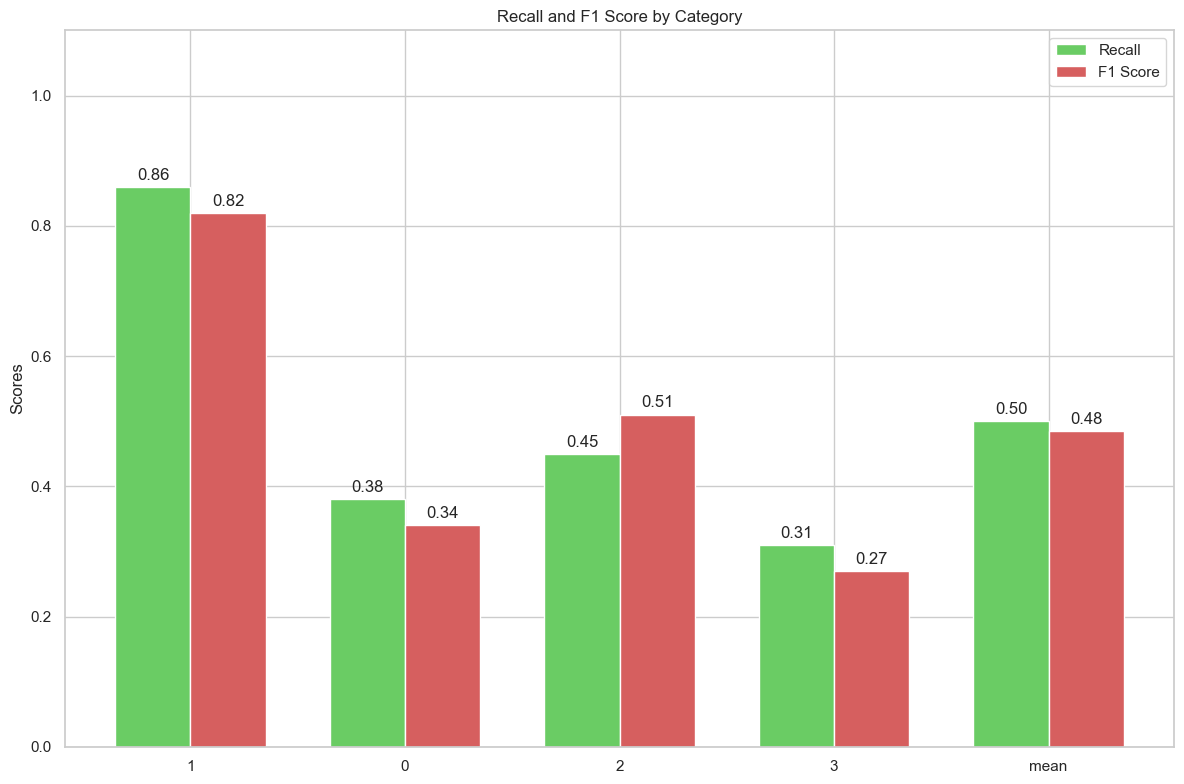

In [58]:
category_recall1 = {1: 0.86, 0: 0.38, 2: 0.45, 3: 0.31}
category_f11 = {1: 0.82, 0: 0.34, 2: 0.51, 3: 0.27}

alpha = 0.5

# Создаем DataFrame
metrics_df = pd.DataFrame({
    'Category': category_recall1.keys(),
    'Recall': category_recall1.values(),
    'F1 Score': category_f11.values()
})

# Вычисление средних значений и добавление их как отдельную категорию
average_recall = metrics_df['Recall'].mean()
average_f1 = metrics_df['F1 Score'].mean()

metrics_df = metrics_df.append({'Category': 'mean', 'Recall': average_recall, 'F1 Score': average_f1}, ignore_index=True)

# Параметры для построения графика
sns.set(style="whitegrid")
palette = sns.color_palette("muted")

categories = metrics_df['Category']
recall = metrics_df['Recall']
f1_scores = metrics_df['F1 Score']

x = np.arange(len(categories))
width = 0.35 

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = ax.bar(x - width/2, recall, width, label='Recall', color=palette[2])
rects2 = ax.bar(x + width/2, f1_scores, width, label='F1 Score', color=palette[3])

ax.set_ylabel('Scores')
ax.set_title('Recall and F1 Score by Category')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Функция для добавления аннотаций на столбцы
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

ax.set_ylim(0, 1.1)

fig.tight_layout()
plt.show()